<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/9/95/Continuous_wavelet_transform.gif" alt="Demo of different wavelets matching signals on Wikipedia" />
</p>

# Wavelet Basics

---

## Overview

Time-series data refers to when data is collected over time, making the order of the data collection and not just the value important. Time-series data can include anything from atmospheric data over a year where the maximum and minimum values corresponds to specific days in a year.

For the purpose of an example, imagine a short piece of music. Each note in the piece can be any note from A to F. Each note varies based on frequency to produce different pitches and notes. Frequency measures the amount of cycles over a single second. A higher frequency is associated with a higher pitch, like an A note, while a lower frequency is associated with a lower pitch, like a C notes.

| Note   | Freq   |
|--------|--------|
| A note | 440 hz |
| B note | 494 hz |
| C note | 261 hz |
| D note | 293 hz |
| E note | 330 hz |
| F note | 350 hz |
| G note | 392 hz |

However, just graphing that a B and a D note appear in the piece does not encapulsate all the information. What is the order? BDDB is very different from DDDDBD. This is the importance of time and order in data that is lost in first passes of signal processing with tools like Fourier Transform.

1. Prerequistites
2. Background
3. Load Wav File for Audio
4. Fourier Transform - Frequency, but not Time
5. Wavelet Terminology
6. Wavelet Transform - Frequency and Time

## Prerequisites
Label the importance of each concept explicitly as **helpful/necessary**.

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Matplotlib](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Necessary | Plotting on a data |
| [Intro to Pandas](https://foundations.projectpythia.org/core/pandas/pandas.html) | Necessary | Familiarity with working with dataframes |
| [Intro to Numpy]| Necessary | Familiarity with working with arrays |
| [Intro to SciPy] | Helpful | Familiarity with working with wave files and FFT |

- **Time to learn**: estimate in minutes. For a rough idea, use 5 mins per subsection, 10 if longer; add these up for a total. Safer to round up and overestimate.
- **System requirements**:
    - Populate with any system, version, or non-Python software requirements if necessary
    - Otherwise use the concepts table above and the Imports section below to describe required packages as necessary
    - If no extra requirements, remove the **System requirements** point altogether

---

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fft, fftfreq
from scipy.io import wavfile
import math
import pywt                                 # PyWavelets
plt.style.use('dark_background')

---

## Background

In [13]:
# Load .wav file data
sample_rate, signal_data = wavfile.read('jingle_bells.wav')

# Frequency determines the chord

duration = len(signal_data) / sample_rate
time = np.arange(0, duration, 1/sample_rate) 

print(f"Sample Rate: {sample_rate}")
print(f"duration = {duration} seconds (sample rate and audioBuffer = {len(signal_data)} / {sample_rate})")
print(f"len of audio file = {len(signal_data)}")
print(f"Total Length in time = {len(time)}")

Sample Rate: 10000
duration = 15.6991 seconds (sample rate and audioBuffer = 156991 / 10000)
len of audio file = 156991
Total Length in time = 156991


In [14]:
signal_df = pd.DataFrame({'time (seconds)': time, 'amplitude': signal_data})
signal_df.head()

,time (seconds),amplitude
0,0.0000,-417
1,0.0001,-2660
2,0.0002,-2491
3,0.0003,6441
4,0.0004,-8540


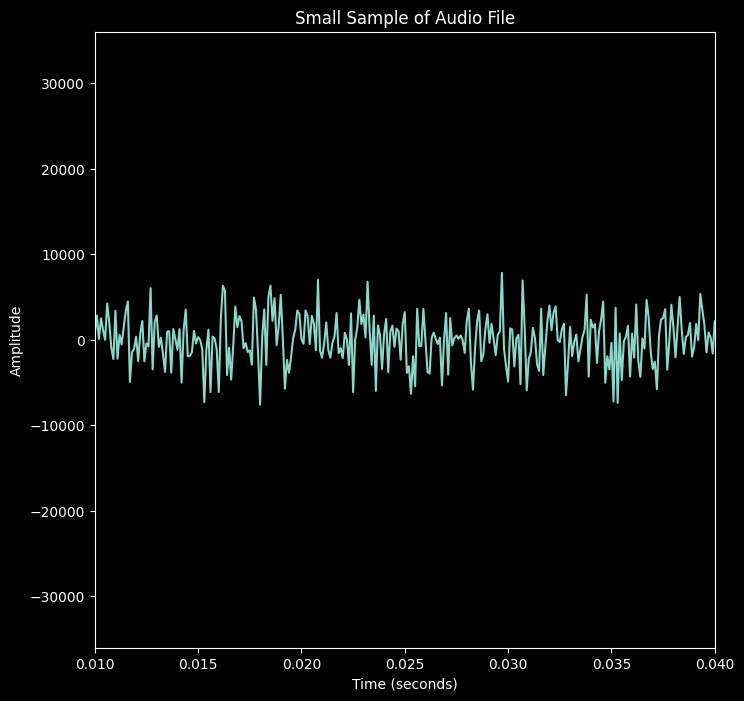

In [16]:
# Plot .wav file
fig, ax = plt.subplots(figsize=(8, 8))
fig = plt.plot(signal_df["time (seconds)"], signal_df["amplitude"])
plt.title("Small Sample of Audio File")
ax.set_xlim(signal_df["time (seconds)"][100], signal_df["time (seconds)"][400])
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

In [17]:
# note frequency in hz
a_freq = 440
print(f"A note {a_freq} hz")
b_freq = 494
print(f"B note {b_freq} hz")
c_freq = 261
print(f"C note {c_freq} hz")
d_freq = 293
print(f"D note {d_freq} hz")
e_freq = 330
print(f"E note {e_freq} hz")
f_freq = 350
print(f"F note {f_freq} hz")
g_freq = 392
print(f"G note {g_freq} hz")

A note 440 hz
B note 494 hz
C note 261 hz
D note 293 hz
E note 330 hz
F note 350 hz
G note 392 hz


## Fourier Transform - Frequency, but not Time

### Advantages (and Disadvantages) of Fourier Transform

The first step of processing new data includes developing a basic understanding of the kinds of frequencies that are present. Are there prevailing patterns? Is one frequency more dominant? How much of the dominant frequencies overcome background noise?

Fourier Transform is a tool that can be used to pull out frequencies from raw data. For a musical example, a Fourier Transform will return the frequencies of all the notes that are present. Jingle Bells is a simple muiscal piece that is taught to beginners and children since it can be entirely played with one hand: 

"Jingle Bells, Jingle Bells, Jingle All the Way" as EEE EEE EGCDE

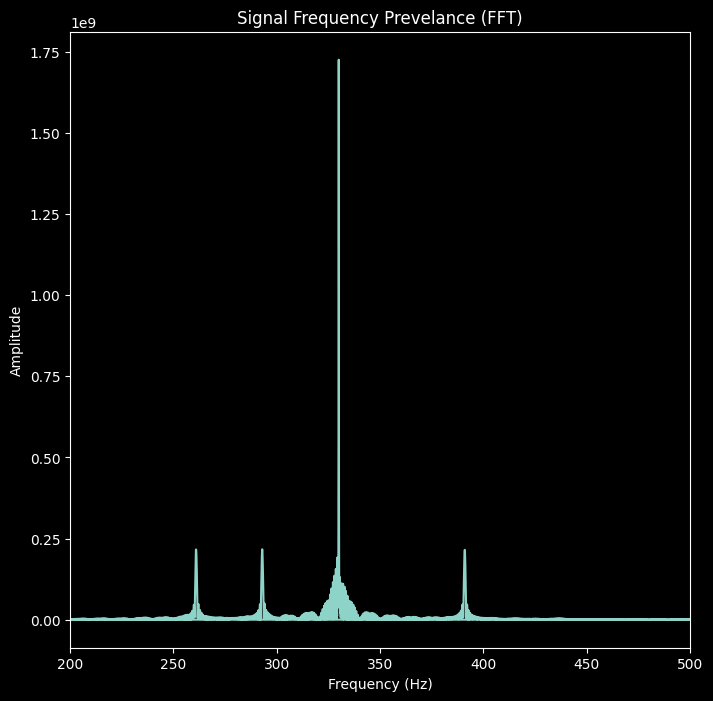

In [18]:
# Collect Fast Fourier Transform Data
fourier_transform = abs(fft(signal_data))
freqs = fftfreq(len(fourier_transform), (1/sample_rate))

# Plot Frequency Prevelance
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
# Only plot positive Frequencies (hz) in range of notes (200-600)
ax.set_xlim(left=200, right=500) 
plt.title("Signal Frequency Prevelance (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

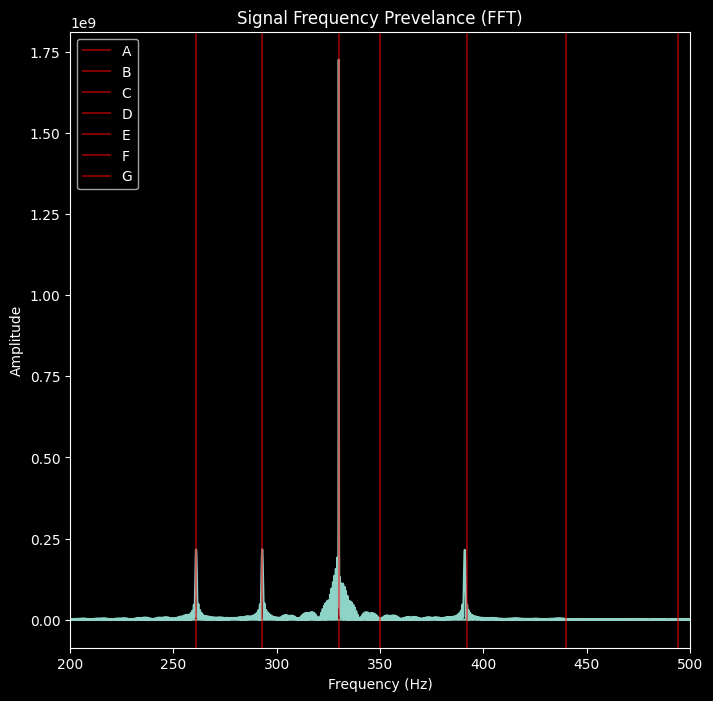

In [11]:
# Plot Frequency Prevelance with Note Overview
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
# Only plot positive Frequencies (hz) in range of notes (200-600)
ax.set_xlim(left=200, right=500) 
# A note: 440 hz
plt.axvline(x=a_freq, color="red", label="A",alpha=0.5)
# B Note: 494 hz
plt.axvline(x=b_freq, color="red", label="B",alpha=0.5)
# C Note: 261 hz
plt.axvline(x=c_freq, color="red", label="C",alpha=0.5)
# D Note: 293 hz
plt.axvline(x=d_freq, color="red", label="D",alpha=0.5)
# E Note: 330 hz
plt.axvline(x=e_freq, color="red", label="E",alpha=0.5)
# F Note: 350 hz
plt.axvline(x=f_freq, color="red", label="F",alpha=0.5)
# G Note: 392 hz
plt.axvline(x=g_freq, color="red", label="G",alpha=0.5)
plt.title("Signal Frequency Prevelance (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

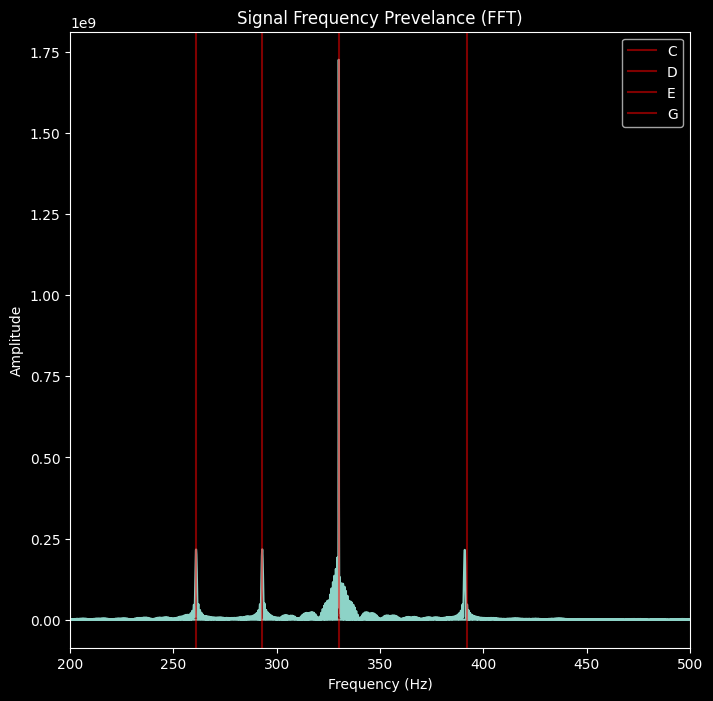

In [19]:
# Plot Frequency Prevelance with Note Overview
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
# Only plot positive Frequencies (hz) in range of notes (200-600)
ax.set_xlim(left=200, right=500) 
# C Note: 261 hz
plt.axvline(x=c_freq, color="red", label="C",alpha=0.5)
# D Note: 293 hz
plt.axvline(x=d_freq, color="red", label="D",alpha=0.5)
# E Note: 330 hz
plt.axvline(x=e_freq, color="red", label="E",alpha=0.5)
# G Note: 391 hz
plt.axvline(x=g_freq, color="red", label="G",alpha=0.5)
plt.title("Signal Frequency Prevelance (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### A content subsection
Divide and conquer your objectives with Markdown subsections, which will populate the helpful navbar in Jupyter Lab and here on the Jupyter Book!

In [ ]:
# some subsection code
new = "helpful information"

### Another content subsection
Keep up the good work! A note, *try to avoid using code comments as narrative*, and instead let them only exist as brief clarifications where necessary.

## Wavelet Terminology

## Wavelet Inputs

- x: Input time-series data (for example: musical note frequency over time)
- wavelet: name of the mother wavelet
- dt: sampling period/rate (time between each y-value)
- s0: smallest scale
- dj: spacing between each scale
- jtot: largest scale

### Time-Series Data

### Mother Wavelet
Wavelets are a powerful tool for signal and time-series data. While Fourier Transforms are a common method of signal analysis, they only return the information about the frequency of the signal and not when the frequencies occur or their duration. Due to Heisenberg's Uncertainty Principle, it is impossible to know both the exact frequency and the exact time that the frequency occurs in a signal. Wavelet transform provide a solution for returning both the frequency and time by reducing the precision of the frequency.

While a Fourier Transform uses various sine waves to match possible frequencies in a signal, a wavelet is a short wave of with various shapes to match possible frequencies and frequency ranges. A wavelet is a small wave over a finite length of time. There are many possible wavelet forms to use. Each type of wavelet is sensitive to a range of possible signals.

If a wavelet is made to match the the frequency of an A note for the duration of a second, then it would be possible to match any A notes present in the musical notes that last at least one second.

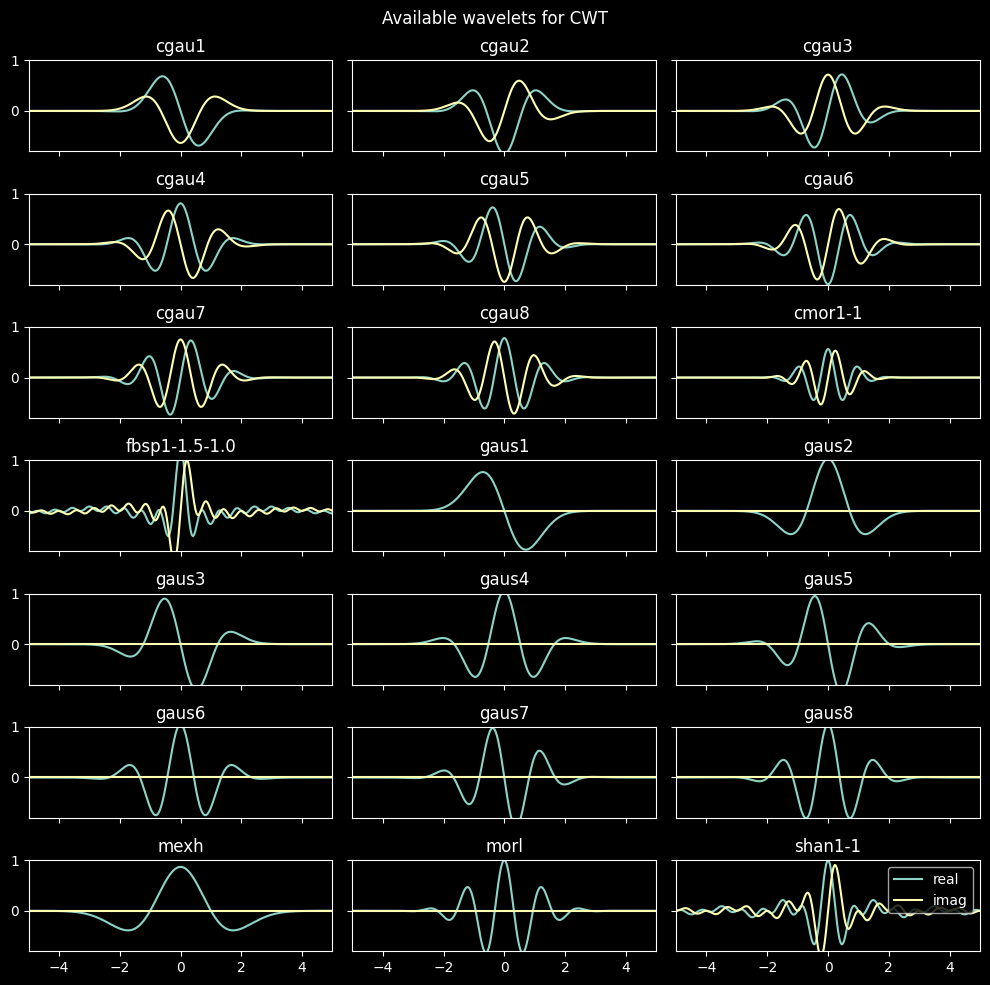

In [20]:
# https://pywavelets.readthedocs.io/en/latest/ref/cwt.html
wavlist = pywt.wavelist(kind="continuous")
cols = 3
rows = (len(wavlist) + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(10, 10),
                        sharex=True, sharey=True)
for ax, wavelet in zip(axs.flatten(), wavlist):
    # A few wavelet families require parameters in the string name
    if wavelet in ['cmor', 'shan']:
        wavelet += '1-1'
    elif wavelet == 'fbsp':
        wavelet += '1-1.5-1.0'

    [psi, x] = pywt.ContinuousWavelet(wavelet).wavefun(10)
    ax.plot(x, np.real(psi), label="real")
    ax.plot(x, np.imag(psi), label="imag")
    ax.set_title(wavelet)
    ax.set_xlim([-5, 5])
    ax.set_ylim([-0.8, 1])

ax.legend(loc="upper right")
plt.suptitle("Available wavelets for CWT")
plt.tight_layout()
plt.show()

### Daughter Wavelet

A mother wavelet represents the basic wavelet shape that is transformed into varied scaled copies known as daughter wavelets. The daughter wavelets are shifted along the entire signal to match possible frequencies over a finite period of time.

### Scales

Wavelet matches various frequencies by stretching and shrinking the mother wavelet based on a range of possible scales.

- Streched Wavelet: A large wavelet will capture large features, low frequencies, slow changing frequencies
- Shrunk Wavelet: A small wavelet will capture small features and high frequencies, sudden changing frequencies

## Sampling Period

The sampling period (matching the sample rate in audio) is hertz when measuring in seconds.

## Last Section

If you're comfortable, and as we briefly used for our embedded logo up top, you can embed raw html into Jupyter Markdown cells (edit to see):

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Your relevant information here!
</div>

Feel free to copy this around and edit or play around with yourself. Some other `admonitions` you can put in:

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Success</p>
    We got this done after all!
</div>

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Be careful!
</div>

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Danger</p>
    Scary stuff be here.
</div>

We also suggest checking out Jupyter Book's [brief demonstration](https://jupyterbook.org/content/metadata.html#jupyter-cell-tags) on adding cell tags to your cells in Jupyter Notebook, Lab, or manually. Using these cell tags can allow you to [customize](https://jupyterbook.org/interactive/hiding.html) how your code content is displayed and even [demonstrate errors](https://jupyterbook.org/content/execute.html#dealing-with-code-that-raises-errors) without altogether crashing our loyal army of machines!

---

## Summary
Add one final `---` marking the end of your body of content, and then conclude with a brief single paragraph summarizing at a high level the key pieces that were learned and how they tied to your objectives. Look to reiterate what the most important takeaways were.

### What's next?
Let Jupyter book tie this to the next (sequential) piece of content that people could move on to down below and in the sidebar. However, if this page uniquely enables your reader to tackle other nonsequential concepts throughout this book, or even external content, link to it here!

## Resources and references
Finally, be rigorous in your citations and references as necessary. Give credit where credit is due. Also, feel free to link to relevant external material, further reading, documentation, etc. Then you're done! Give yourself a quick review, a high five, and send us a pull request. A few final notes:
 - `Kernel > Restart Kernel and Run All Cells...` to confirm that your notebook will cleanly run from start to finish
 - `Kernel > Restart Kernel and Clear All Outputs...` before committing your notebook, our machines will do the heavy lifting
 - Take credit! Provide author contact information if you'd like; if so, consider adding information here at the bottom of your notebook
 - Give credit! Attribute appropriate authorship for referenced code, information, images, etc.
 - Only include what you're legally allowed: **no copyright infringement or plagiarism**
 
Thank you for your contribution!